
#  Clustering




## **Description**

Iris Data Set:
A dataset containing information about different types of flowers. Each flower is described using four features - sepal length, sepal width, petal length, and petal width. The dataset contains 150 samples, with 50 samples for each of the three vareity of flowers - Iris setosa, Iris virginica, and Iris versicolor.





## **Tasks to Code**
1.  Load the dataset using Python libraries such as Pandas and Numpy.
2.   Visualize the dataset using scatter plots to see if there are any natural clusters in the data.
3. Preprocess the data by scaling it to ensure that all the features are on the same scale.  
4.Use the KMeans algorithm to cluster the data into three clusters, one for each type of flower.
5.  Visualize the clusters using scatter plots and color-coding to see how well the algorithm was able to separate the different types of flowers.
6. Evaluate the quality of the clustering using metrics such as the silhouette score.
7.  EX_independentperiment with different values of K (the number of clusters) to see how it affects the quality of the clustering.
8.   Implement hierarchical clustering and compare the results with KMeans.




In [ ]:
import pandas as pd                  #dataset
import numpy as np                   #arrays
import matplotlib.pyplot as plt      #charts and graphs
from sklearn.cluster import KMeans   #for kmeans unsupervised clustering
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Task-1

Mydataganga = pd.read_csv("iris.csv")         #loading the dataset iris


In [ ]:
Mydataganga.head()                            #displays the columns and first five rows of the dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
Mydataganga['variety'].unique()                #displays all the unique values under the column variety

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
Mydataganga.shape                              #displays the number of rows and columns in the dataset

(150, 5)

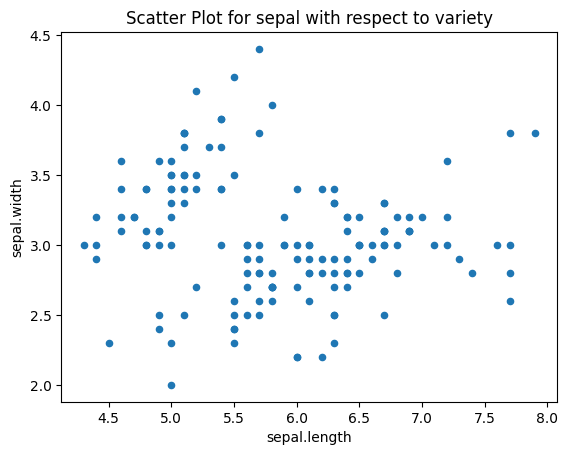

In [ ]:
#Task 2

variable = Mydataganga[Mydataganga.variety=='Setosa'].plot.scatter(x='sepal.length', y='sepal.width')
Mydataganga[Mydataganga.variety=='Versicolor'].plot.scatter(x='sepal.length', y='sepal.width',ax=variable)
Mydataganga[Mydataganga.variety=='Virginica'].plot.scatter(x='sepal.length', y='sepal.width',ax=variable)
variable.set_title("Scatter Plot for sepal with respect to variety")
plt.show()


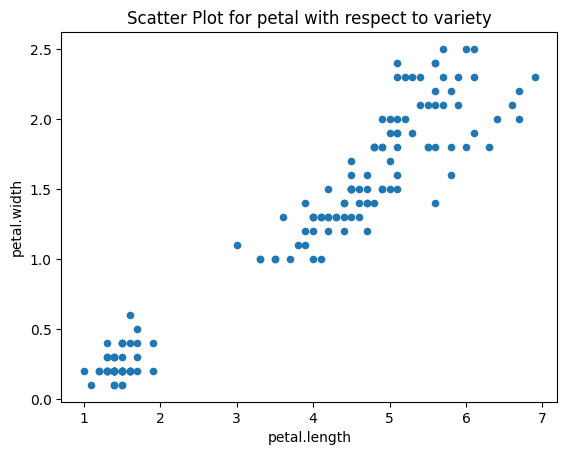

In [ ]:
variable1 = Mydataganga[Mydataganga.variety=='Setosa'].plot.scatter(x='petal.length', y='petal.width')
Mydataganga[Mydataganga.variety=='Versicolor'].plot.scatter(x='petal.length', y='petal.width', ax=variable1)
Mydataganga[Mydataganga.variety=='Virginica'].plot.scatter(x='petal.length', y='petal.width', ax=variable1)
variable1.set_title("Scatter Plot for petal with respect to variety")
plt.show()

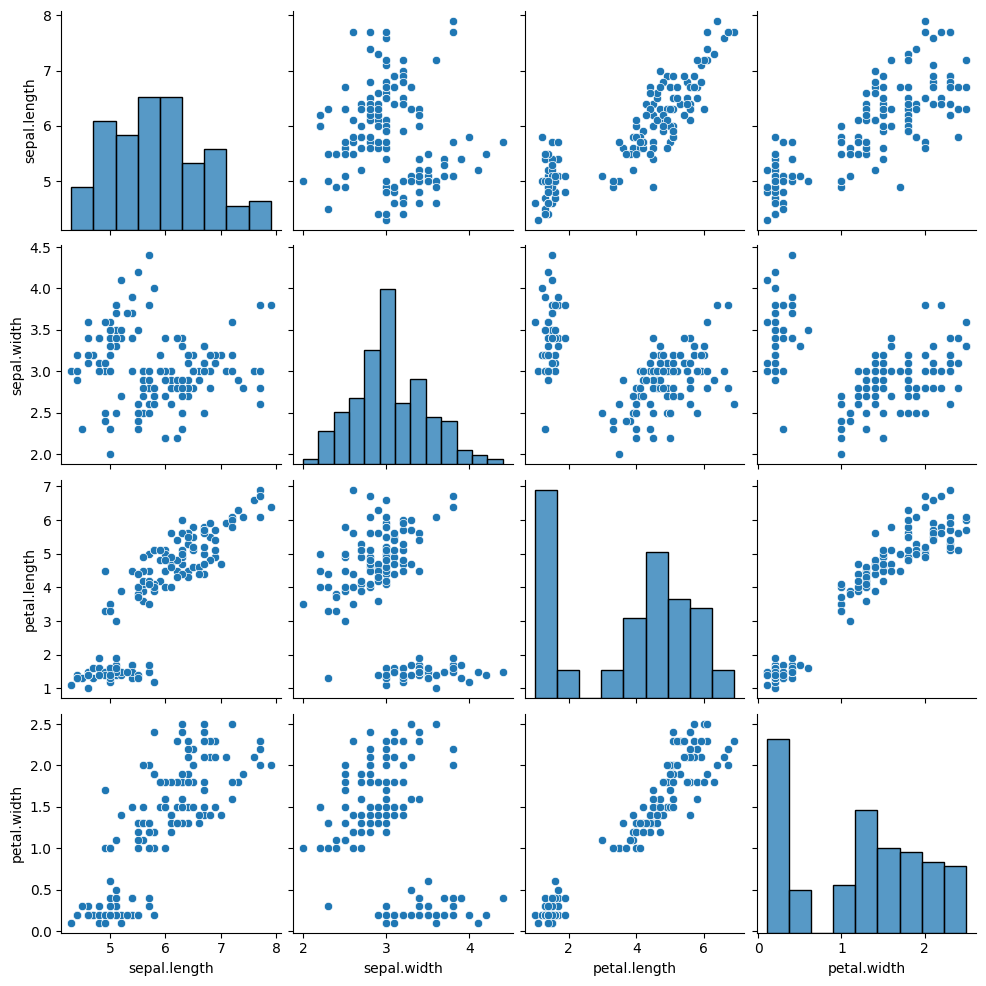

In [ ]:
#visualizing the data set using seaborn library
import seaborn as sns        #statistical graphics - makes easy to visulize and understand the data easily

sns.pairplot(Mydataganga)  #pair plot displays the relationship between multiple variables/features in a dataset


In [ ]:
#Preprocessing

Mydataganga.isnull().sum()    #displays the total count of null values in the dataset

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
#label condind -- numerical to catergorical
#label encoder is only used for single column
from sklearn.preprocessing import LabelEncoder        #using label encoding to convert the categorical to numerical.
le = LabelEncoder()
Mydataganga['variety'] = le.fit_transform(Mydataganga['variety'])       #variety is categorical column in the dataset

In [ ]:
Mydataganga['variety'].unique()                                #displays the unique values in variety column

array([0, 1, 2])

In [ ]:
Mydataganga.columns                                            #displays the columns of the

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [ ]:
#Task 3

#standardization to scale all the festure values to same range
from sklearn.preprocessing import StandardScaler
num_cols=['sepal.length', 'sepal.width', 'petal.length', 'petal.width']       #i have creted a varinble num_cols to store all the numeric columns and standardize them
scg = StandardScaler()
scg_num_cols=scg.fit_transform(Mydataganga[num_cols])
Mydataganga[num_cols]=scg_num_cols


In [ ]:
Mydataganga.head()                          #as we can see that after standardization , the values from the numerical colums has scaled to -3 to +3 range

,sepal.length,sepal.width,petal.length,petal.width,variety
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [ ]:
X_independent=Mydataganga.iloc[:,:-1].values            #storing the independent features to X_independent variable

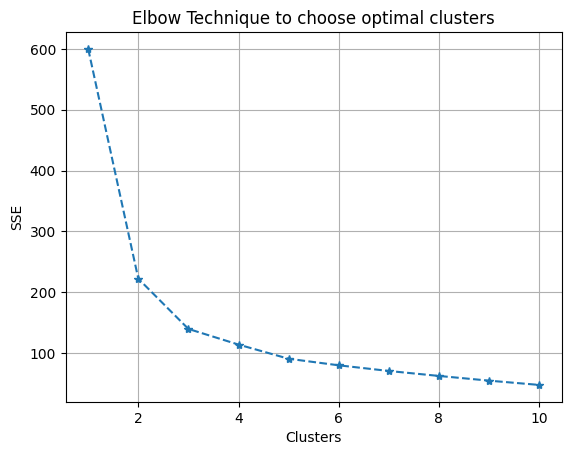

In [ ]:
#Task 3

#KMeans clustering techniques produce k optimal clusters using the elbow approach.
#Plot the sum of squared errors (SSE), or inertia, vs cluster number using the KMeans technique with different k values.
#The plot's "elbow" is optimal cluster count.
emptylist_SSE = []   #created an empty list to store the sum of squared errors
ganga = range(1,11)
# Trying different values of k
for k in ganga:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_independent)

    # Sum of squared errors (inertia) for the elbow method
    emptylist_SSE.append(kmeans.inertia_)

#elbow curve
plt.plot(ganga, emptylist_SSE, marker='*', linestyle='dashed')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.title('Elbow Technique to choose optimal clusters')
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_pred_km = kmeans.fit_predict(X_independent)   #training the independent variables into kmeans clustering

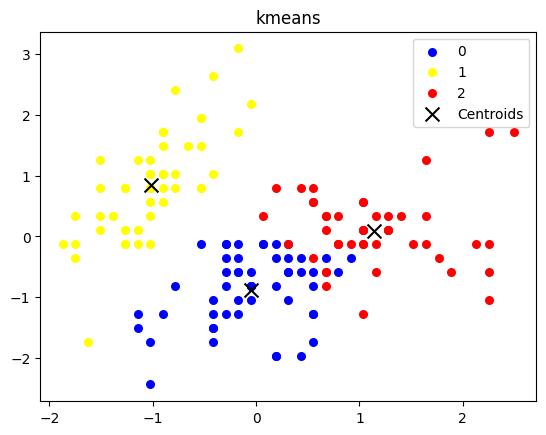

In [ ]:
#Visualising the clusters
plt.title('kmeans')
plt.scatter(X_independent[y_pred_km == 0, 0], X_independent[y_pred_km == 0, 1], s = 30, c = 'blue', label = '0')
plt.scatter(X_independent[y_pred_km == 1, 0], X_independent[y_pred_km == 1, 1], s = 30, c = 'yellow', label = '1')
plt.scatter(X_independent[y_pred_km == 2, 0], X_independent[y_pred_km == 2, 1], s = 30, c = 'red', label = '2')


#cebtroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], marker='x',s = 100, c = 'black', label = 'Centroids')


plt.legend()

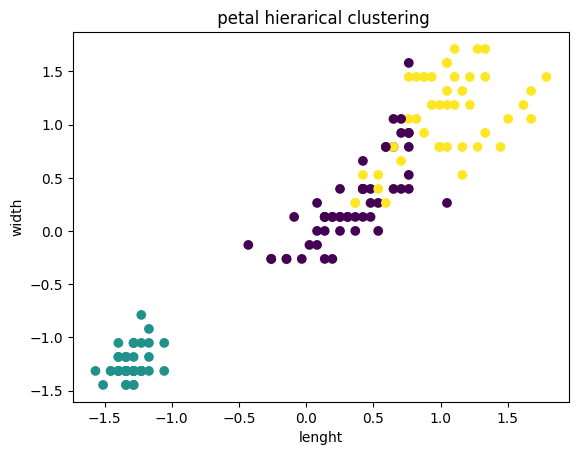

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Mydataganga['y_pred_km'] = kmeans.fit_predict(X_independent)  #training the independent features in kmeans clustering

plt.scatter(Mydataganga['petal.length'],Mydataganga['petal.width'],c=Mydataganga['y_pred_km'], cmap='viridis')   #scatter plot for petal kmeans
plt.title(' petal hierarical clustering')  #title
plt.xlabel('lenght')
plt.ylabel('width')
plt.show()

In [ ]:
#Task 6

from sklearn.metrics import silhouette_score
s_avg = silhouette_score(X_independent, y_pred_km)
print(f"Silhouette Score: {s_avg}")
#Measures how well-separated the clusters are.
#The silhouette score ranges from -1 to 1,
#where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
#as we can see the silhoute score is 0.55, which means cluters are overlapping

Silhouette Score: 0.45994823920518646


clusters = 2, Silhouette Score is: 0.5817500491982808
clusters = 3, Silhouette Score is: 0.45994823920518646
clusters = 4, Silhouette Score is: 0.38694104154427816
clusters = 5, Silhouette Score is: 0.34194697093163473
clusters = 6, Silhouette Score is: 0.32674451109112396
clusters = 7, Silhouette Score is: 0.3241360111543788
clusters = 8, Silhouette Score is: 0.3328739067356281
clusters = 9, Silhouette Score is: 0.3561629819248505
clusters = 10, Silhouette Score is: 0.3599558463589516


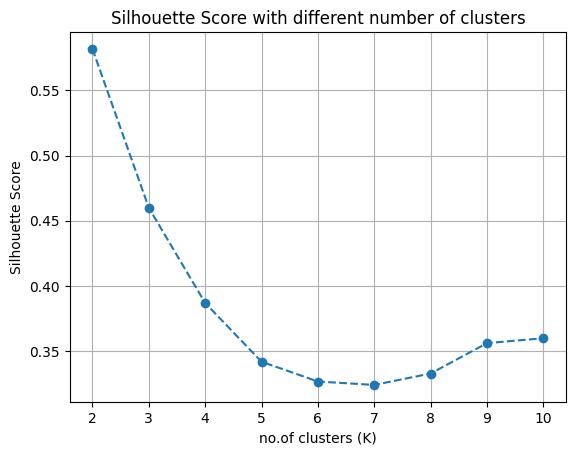

In [ ]:
#Task 7

range = range(2, 11)                     #value of range lies in 2 to 11
emptylist = []                           #created an empty list to store the sum of squared errors

for k in range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42) #creating the kmeans unsupervise learning
    kmeans.fit(X_independent)                                         #training the independent data into kmeans

    s_avg = silhouette_score(X_independent, kmeans.labels_)           #kmeans.labels_   - cluster labels
    emptylist.append(s_avg)                               #storing the silhouette score in the empty list by appending s_avg

    print(f"clusters = {k}, Silhouette Score is: {s_avg}")

#plotting the line chat for silhoutte scores and number of clusters
plt.plot(range, emptylist, marker='o',linestyle='dashed')
plt.title('Silhouette Score for Different Values of K')
plt.xlabel('no.of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.title('Silhouette Score with different number of clusters')
plt.show()

#if the silhoutte score is 1 -  clusters are well saperated
#if the silhoutte score is 0 -  clusters are overlapping
#if the silhoutte score is -1 -  clusters are incorrect
#generally more number of clusters, less is sum of squared error

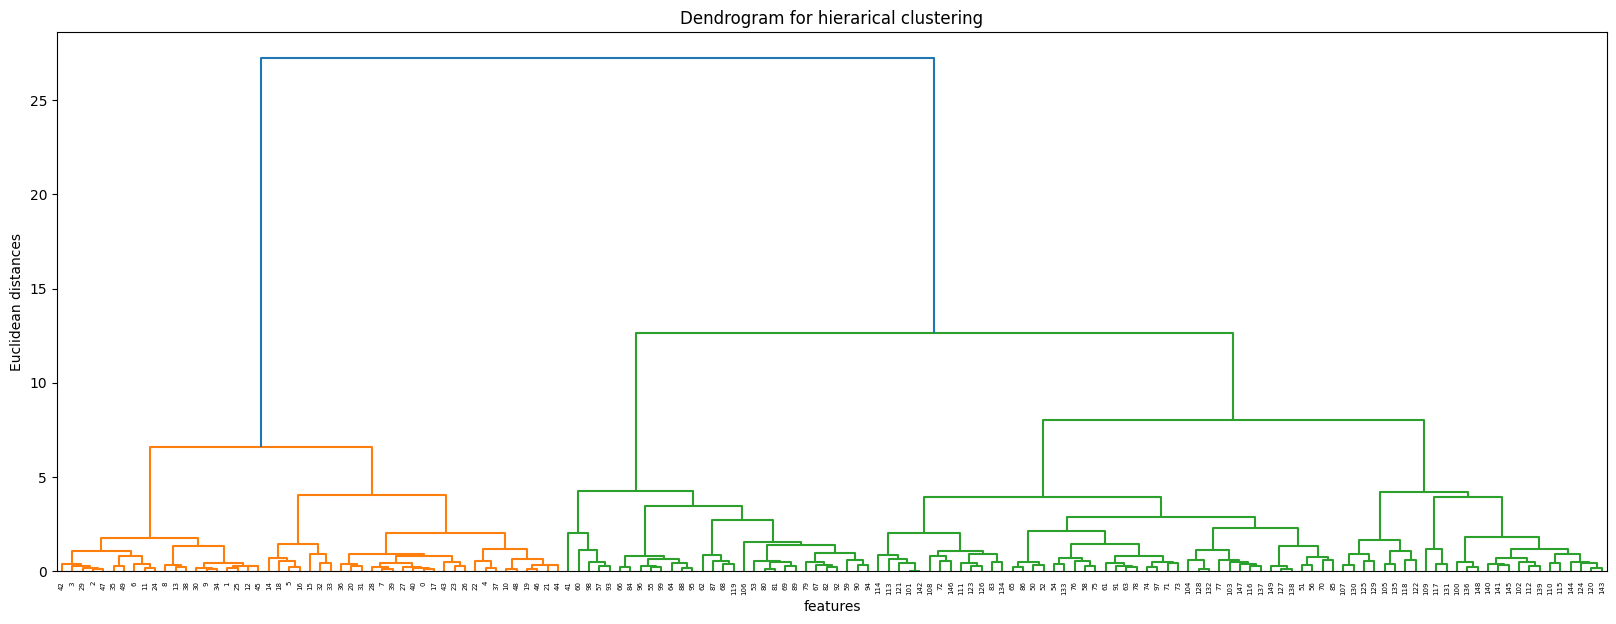

In [ ]:
#generally a tree diagram is dendogram , we use it in hierarchical clustering.
#Dendogram ,shows which two similar data items are grouped into clusters by hierarical clustering technique
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,7))
D = sch.dendrogram(sch.linkage(X_independent, method = 'ward'))
plt.title('Dendrogram for hierarical clustering')  #title
plt.xlabel('features')                             #X_independent aX_independentis label
plt.ylabel('Euclidean distances')                  #y aX_independentis label

plt.show()

In [ ]:
#Task 8

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_pred_hierarical = hc.fit_predict(X_independent)
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_independent, y_pred_hierarical)
print(f"Silhouette Score for hierarical: {silhouette_avg}")

Silhouette Score for hierarical: 0.446689041028591


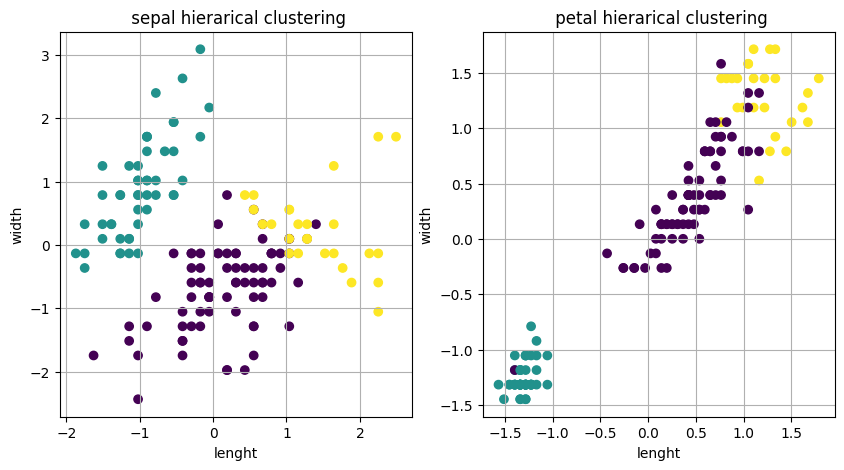

Silhouette Score for hierarical: 0.4545638902112453


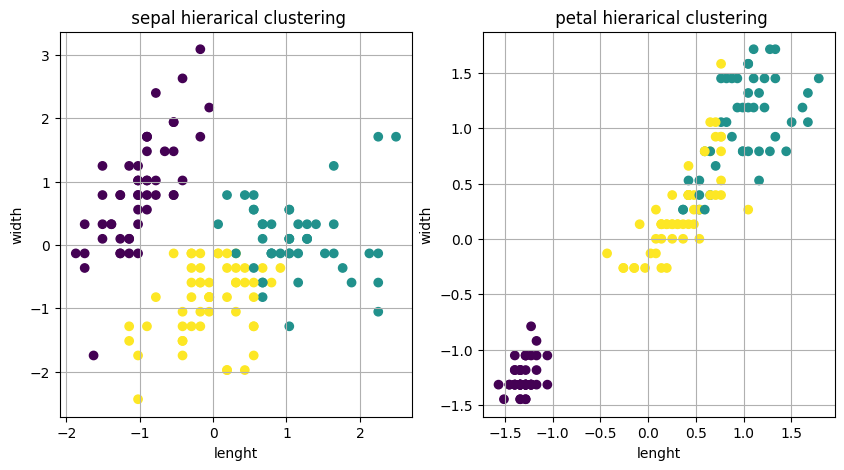

Silhouette Score for hierarical: 0.5845102148899308


In [ ]:
#comparing the hierarical and kmeans clustering
from sklearn.cluster import AgglomerativeClustering     #importing hierarical clustering
from sklearn.metrics import silhouette_score            #evaluation
import matplotlib.pyplot as plt                         #charts and graphs

#hierarical cliustering
X_independent=Mydataganga.iloc[:,:-1].values            #independent data
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
Mydataganga['y_pred'] = hc.fit_predict(X_independent)   #training the independent features in kmeans clustering

plt.figure(figsize=(10,5))                              #figure size

plt.subplot(1,2,1)
plt.scatter(Mydataganga['sepal.length'],Mydataganga['sepal.width'],c=Mydataganga['y_pred'], cmap='viridis')    #scatter plot for sepal hierarical
plt.title(' sepal hierarical clustering')               #title
plt.xlabel('lenght')
plt.ylabel('width')
plt.grid(True)


plt.subplot(1,2,2)
plt.scatter(Mydataganga['petal.length'],Mydataganga['petal.width'],c=Mydataganga['y_pred'], cmap='viridis')  #scatter plot for petal hierarical
plt.title(' petal hierarical clustering')  #title
plt.xlabel('lenght')
plt.ylabel('width')
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_independent, y_pred_hierarical)
print(f"Silhouette Score for hierarical: {silhouette_avg}")

#kmeans clustering
X_independent=Mydataganga.iloc[:,:-1].values

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Mydataganga['y_pred_km'] = kmeans.fit_predict(X_independent)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(Mydataganga['sepal.length'],Mydataganga['sepal.width'],c=Mydataganga['y_pred_km'], cmap='viridis')   #scatter plot for sepal kmeans
plt.title(' sepal hierarical clustering')  #title
plt.xlabel('lenght')
plt.ylabel('width')
plt.grid(True)


plt.subplot(1,2,2)
plt.scatter(Mydataganga['petal.length'],Mydataganga['petal.width'],c=Mydataganga['y_pred_km'], cmap='viridis')   #scatter plot for petal kmeans
plt.title(' petal hierarical clustering')  #title
plt.xlabel('lenght')
plt.ylabel('width')
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score
s_avg = silhouette_score(X_independent, y_pred_km)
print(f"Silhouette Score: {s_avg}")